DROPOUT


---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model_without_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_without_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history_without_dropout = model_without_dropout.fit(
    X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/20
375/375 - 9s - 24ms/step - accuracy: 0.9284 - loss: 0.2434 - val_accuracy: 0.9617 - val_loss: 0.1252
Epoch 2/20
375/375 - 7s - 19ms/step - accuracy: 0.9730 - loss: 0.0898 - val_accuracy: 0.9710 - val_loss: 0.0949
Epoch 3/20
375/375 - 7s - 18ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9739 - val_loss: 0.0886
Epoch 4/20
375/375 - 11s - 29ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9760 - val_loss: 0.0830
Epoch 5/20
375/375 - 9s - 25ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9775 - val_loss: 0.0817
Epoch 6/20
375/375 - 10s - 26ms/step - accuracy: 0.9926 - loss: 0.0225 - val_accuracy: 0.9745 - val_loss: 0.0964
Epoch 7/20
375/375 - 7s - 20ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9788 - val_loss: 0.0846
Epoch 8/20
375/375 - 6s - 16ms/step - accuracy: 0.9949 - loss: 0.0143 - val_accuracy: 0.9759 - val_loss: 0.1073
Epoch 9/20
375/375 - 7s - 20ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9758 - val_los

In [5]:
model_with_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_with_dropout.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history_with_dropout = model_with_dropout.fit(
    X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/20
375/375 - 9s - 25ms/step - accuracy: 0.8817 - loss: 0.3865 - val_accuracy: 0.9542 - val_loss: 0.1493
Epoch 2/20
375/375 - 9s - 23ms/step - accuracy: 0.9487 - loss: 0.1725 - val_accuracy: 0.9661 - val_loss: 0.1115
Epoch 3/20
375/375 - 10s - 27ms/step - accuracy: 0.9570 - loss: 0.1382 - val_accuracy: 0.9712 - val_loss: 0.0933
Epoch 4/20
375/375 - 11s - 29ms/step - accuracy: 0.9642 - loss: 0.1168 - val_accuracy: 0.9755 - val_loss: 0.0892
Epoch 5/20
375/375 - 11s - 30ms/step - accuracy: 0.9701 - loss: 0.0974 - val_accuracy: 0.9777 - val_loss: 0.0798
Epoch 6/20
375/375 - 9s - 25ms/step - accuracy: 0.9715 - loss: 0.0909 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 7/20
375/375 - 10s - 25ms/step - accuracy: 0.9743 - loss: 0.0807 - val_accuracy: 0.9784 - val_loss: 0.0744
Epoch 8/20
375/375 - 10s - 28ms/step - accuracy: 0.9752 - loss: 0.0776 - val_accuracy: 0.9787 - val_loss: 0.0742
Epoch 9/20
375/375 - 11s - 30ms/step - accuracy: 0.9780 - loss: 0.0700 - val_accuracy: 0.9791 - val

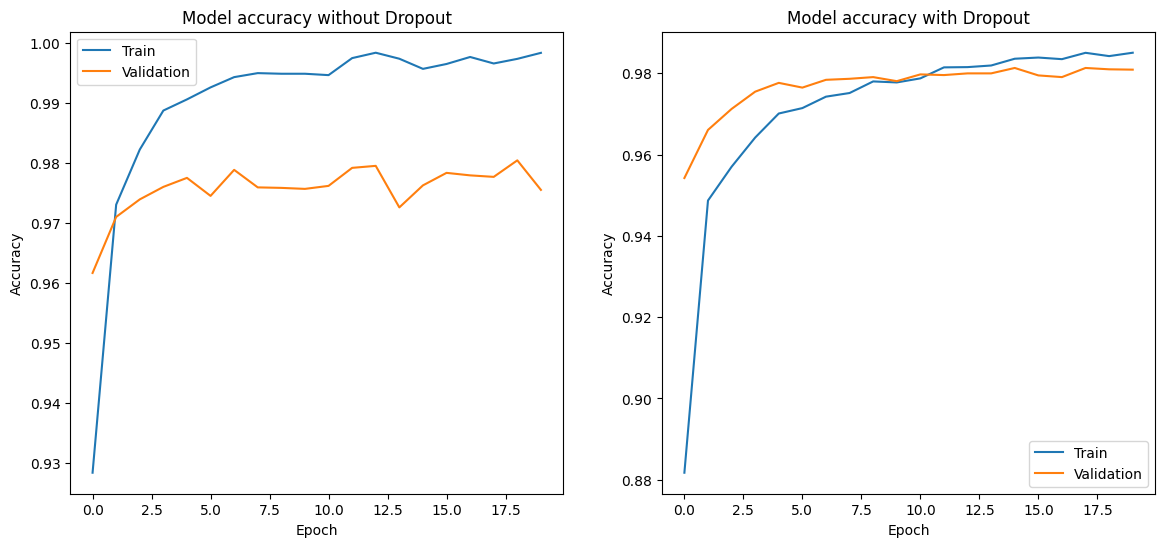

In [7]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_without_dropout.history['accuracy'], label='Train')
plt.plot(history_without_dropout.history['val_accuracy'], label='Validation')
plt.title('Model accuracy without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['accuracy'], label='Train')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation')
plt.title('Model accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

EARLY STOPPING

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
import tensorflow_datasets as tfds

In [14]:
ds = tfds.load('mnist', split='train')

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [15]:
def preprocess(element):
    image = element['image']
    label = element['label']
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds = ds.map(preprocess).shuffle(10000).batch(32)

train_size = int(0.8 * len(list(ds)))
train_ds = ds.take(train_size)
val_ds = ds.skip(train_size)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [19]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=20,
          callbacks=[early_stopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8690 - loss: 0.4641 - val_accuracy: 0.9571 - val_loss: 0.1489
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9575 - loss: 0.1414 - val_accuracy: 0.9702 - val_loss: 0.1066
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9722 - loss: 0.0911 - val_accuracy: 0.9793 - val_loss: 0.0766
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9797 - loss: 0.0682 - val_accuracy: 0.9817 - val_loss: 0.0643
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9762 - val_loss: 0.0814
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9882 - loss: 0.0397 - val_accuracy: 0.9848 - val_loss: 0.0564
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9903 - loss: 0.0325 - val_accuracy: 0.9866 - val_loss: 0.0489
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9922 - loss:

MULTI TASKING

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_parity = y_train % 2
y_test_parity = y_test % 2

y_train_digits = tf.keras.utils.to_categorical(y_train, 10)
y_test_digits = tf.keras.utils.to_categorical(y_test, 10)

input_layer = layers.Input(shape=(28, 28))

x = layers.Flatten()(input_layer)
x = layers.Dense(128, activation='relu')(x)

digit_output = layers.Dense(10, activation='softmax', name='digit')(x)

parity_output = layers.Dense(1, activation='sigmoid', name='parity')(x)

model = models.Model(inputs=input_layer, outputs={'digit': digit_output, 'parity': parity_output})

model.compile(optimizer='adam',
              loss={'digit': 'categorical_crossentropy', 'parity': 'binary_crossentropy'},
              metrics={'digit': 'accuracy', 'parity': 'accuracy'})

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    x_train,
    {'digit': y_train_digits, 'parity': y_train_parity},
    validation_data=(x_test, {'digit': y_test_digits, 'parity': y_test_parity}),
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - digit_accuracy: 0.8701 - digit_loss: 0.4511 - loss: 0.6715 - parity_accuracy: 0.9090 - parity_loss: 0.2204 - val_digit_accuracy: 0.9584 - val_digit_loss: 0.1387 - val_loss: 0.2120 - val_parity_accuracy: 0.9750 - val_parity_loss: 0.0732
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - digit_accuracy: 0.9634 - digit_loss: 0.1221 - loss: 0.1891 - parity_accuracy: 0.9765 - parity_loss: 0.0670 - val_digit_accuracy: 0.9682 - val_digit_loss: 0.1042 - val_loss: 0.1564 - val_parity_accuracy: 0.9825 - val_parity_loss: 0.0520
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - digit_accuracy: 0.9763 - digit_loss: 0.0799 - loss: 0.1292 - parity_accuracy: 0.9833 - parity_loss: 0.0493 - val_digit_accuracy: 0.9686 - val_digit_loss: 0.0976 - val_loss: 0.1493 - val_parity_accuracy: 0.9813 - val_parity_loss: 0.0515
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - digit_accuracy: 0.9823 - digit_loss: 0.0612 - loss: 0.0996 - par

GRADIENT CLIPPING

In [22]:
model = models.Model(inputs=input_layer, outputs=digit_output)

optimizer_with_clipping = tf.keras.optimizers.Adam(clipvalue=1.0)
model.compile(optimizer=optimizer_with_clipping,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=20
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accuracy: 0.9763 - val_loss: 0.0878
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9944 - loss: 0.0195 - val_accuracy: 0.9798 - val_loss: 0.0786
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9962 - loss: 0.0135 - val_accuracy: 0.9779 - val_loss: 0.0850
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.9780 - val_loss: 0.0870
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9755 - val_loss: 0.0997
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9746 - val_loss: 0.1115
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9781 - val_loss: 0.0945
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9986 - loss: 0.